In [1]:
import numpy as np

#from load_data_mongoloids import load_data_mongoloids
#from mongoloids_config import config

#from load_data_cancer import load_data_cancer
#from cancer_config import config

from transform_data import *
import time
import matplotlib
import matplotlib.pyplot as plt
import textwrap
import scipy.stats as stats

from infrastructure.configuration import param
import matplotlib.pylab as pylab
import seaborn
seaborn.set_style('darkgrid', {'legend.frameon':True})
fontsize = 70
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
 'axes.labelsize': fontsize,
 'axes.titlesize':fontsize,
 'xtick.labelsize':fontsize,
 'ytick.labelsize':fontsize}
pylab.rcParams.update(params)
plt.rc('axes', labelsize=fontsize) 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from configurations.config_gene_datasets import config 

In [20]:
#top_thr_cpg_genes_path = config.ofname([["top_thr_corr_graph"], ["top_thr_corr_graph_not_in_list_cpgs"]], ext = ".txt", include_set = config.params_sets["diff_graph"])
top_thr_cpg_genes_path = config.ofname([["Igor_age_dependent_cpg_variance"]], ext = ".txt")
#genes_names = np.genfromtxt(top_thr_cpg_genes_path, dtype='str', usecols = 0)
#cpg_names = np.genfromtxt(top_thr_cpg_genes_path, dtype='str', usecols = 1)
#beta = np.genfromtxt(top_thr_cpg_genes_path, dtype='float32', delimiter=' ')[:, 2:]

import pandas as pd
top_thr_cpg_genes_df = pd.read_csv(top_thr_cpg_genes_path, skiprows=1, header=None)

genes_names = top_thr_cpg_genes_df[0].drop_duplicates()
#print genes_names

for i, gene_name in enumerate(genes_names):
    print (gene_name)
    df = top_thr_cpg_genes_df[top_thr_cpg_genes_df[0] == gene_name]
    df = df.drop(0, axis = 1)
    top_thr_cpg_gene_path = config.ofname([["top_thr_corr_graph"], ["cpg_per_gene_not_in_list"], ["cpg_gene_" + gene_name]], ext = ".txt", include_set = config.params_sets["diff_graph"])
    df.to_csv(top_thr_cpg_gene_path, sep='\t', header = False, index = False)
    

cg17839237


TypeError: 'set' object is not subscriptable

In [21]:
top_thr_cpg_genes_df

,0
0,cg17839237
1,cg21502255
2,cg22058122
3,cg13566610
4,cg11113760
5,cg25032595
6,cg03823904
7,cg16976910
8,cg26477573
9,cg10652091


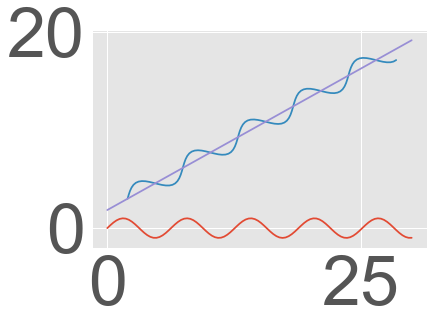

In [60]:
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt 

fig=plt.figure() 
#ax = fig.add_axes()
x = np.linspace(0, 30, 100)
y = np.sin(x)

x0 = 2
y0 = 3
alpha = np.pi * 30 / 180

x1 = x0 + x * np.cos(alpha) - y * np.sin(alpha)
y1 = y0 + x * np.sin(alpha) + y * np.cos(alpha)

plt.plot(x, y)
plt.plot(x1, y1)


plt.plot(x, np.tan(alpha) * (x - x0) + y0)
# for rotate the axes and update. 
 

In [ ]:
from annotations.cpgs import cpgs_annotation
cpgs = cpgs_annotation(config.ifname('cpgs_annotations'))

In [28]:
dataset_names = ["Igor_age_dependent_cpg_variance",
                 "Igor_GSE87571_sex_specific_variance",
                 "Olga_GSE87571_list_significant_beta_and_sigma2_cpgs_p0_001_F",
                 "Olga_GSE87571_list_significant_beta_and_sigma2_cpgs_p0_001_M",
                 "down_related_2015_cpgs",
                ]

for dataset_name in dataset_names:
    cpg_path = config.ofname([[dataset_name]], ext = ".txt")
    gene_path = config.ofname([["genes", dataset_name]], ext = ".txt")

    import pandas as pd
    df_cpg = pd.read_csv(cpg_path, skiprows=1, header=None)

    cpg_names = df_cpg[0].values

    gene_names = cpgs.get_crit_col_values('gene', {'cpgs_in': cpg_names, 'gene_out': [np.NaN]})

    df_genes = pd.DataFrame({'gene': gene_names})

    df_genes.to_csv(gene_path, index = False)

['KCNC1', 'SGPP2', 'BTNL9', 'WDR69', 'MIR375', 'OPCML', 'THRB', 'TRIL', 'GDF6', 'RIPPLY2']
['C6orf168', 'NPHP1', 'PTPRN2', 'TMED5', 'ANKAR', 'PRKG1', 'SHISA2', 'FAM107B', 'CACNA1H', 'IGF2BP1']
['HMX2', 'EPB41L3', 'TSPYL5', 'RFX6', 'GDNF', 'DPP10', 'RGS22', 'KLF14', 'TMEM179', 'SOX17']
['HMX2', 'ITGA2B', 'KLF14', 'LHX8', 'LOC100192378', 'HINT2', 'EBF4', 'CALN1', 'HSPB6', 'RNF32']
['RBL2', 'OCEL1', 'HMX2', 'SYT7', 'CBR4', 'SERINC5', 'LOXL1', 'RALYL', 'OBSL1', 'INHA']


In [16]:
df[cpgs.crit_cols['gene']].values

array(['KCNC1', 'SGPP2', 'BTNL9', 'WDR69', 'MIR375', 'OPCML', 'THRB',
       'TRIL', 'GDF6', 'RIPPLY2', 'CNTN1', 'DOCK1', 'THRB', 'C1QL2',
       'PTGS2', 'NKX6-2', 'VENTX', 'HPGD', 'RSPO2', 'TBCD', 'FAM163A',
       'ELAVL4', 'EFNA5', 'SNCAIP', 'RTN1', 'FBXL21', 'SYNM',
       {'FOXL2', 'C3orf72'}, 'TMEM229A', 'PER3', 'APCDD1', 'KCNK9',
       'KCNB1', 'PAX9', 'SH2B2', 'VWC2', 'CCDC149', 'CCDC67', 'MIR129-2',
       'IRS2', 'IGFBP7', 'GALR3',
       {'PCDHA9', 'PCDHA11', 'PCDHA7', 'PCDHA3', 'PCDHA13', 'PCDHAC1', 'PCDHA10', 'PCDHA2', 'PCDHA4', 'PCDHA8', 'PCDHA5', 'PCDHA12', 'PCDHA6', 'PCDHA1'},
       'LGI2', 'SP9',
       {'PCDHA9', 'PCDHA11', 'PCDHA7', 'PCDHA3', 'PCDHA13', 'PCDHAC1', 'PCDHA10', 'PCDHA2', 'PCDHA4', 'PCDHA8', 'PCDHA5', 'PCDHA12', 'PCDHA6', 'PCDHA1'},
       'ISM1', 'STL', 'MGC45800', 'GNMT', 'HBQ1',
       {'PCDHGA2', 'PCDHGB7', 'PCDHGB5', 'PCDHGA1', 'PCDHGB1', 'PCDHGA10', 'PCDHGA4', 'PCDHGA9', 'PCDHGB6', 'PCDHGC3', 'PCDHGA7', 'PCDHGA12', 'PCDHGA6', 'PCDHGA5', 'PCDHGB3